# Case técnico

- David Morosini de Assumpção

A Diretoria de Risco de Crédito de grande banco brasileiro te contratou para desenvolver um modelo preditivo que os ajude a identificar os clientes com maior probabilidade de default, seja negando o empréstimo, ou concendo-o sob uma maior taxa de juros, o que permitirá um aumento na lucratividade dessa determinada carteira de clientes.

Sua tarefa será prever a probabilidade de default - que está identificado na variável default do dataset.  O resultado de seu estudo será encaminhado para as áreas jurídica e de negócios para a elaboração de novos contratos e produtos, portanto os resultados precisam ser acompanhados de uma explicação do funcionamento do seu modelo, em diferentes cenários.

Parte dos dados foi anonimizado para preservar o caráter sigiloso da informação. Você ainda poderá utilizar essas variáveis na sua análise caso desejar.

Os resultados devem ser apresentados para a equipe avaliadora em power point ou dashboard em tableau, power bi, qlik (ou qualquer outra forma de visualização de sua preferência). Nessa apresentação deverão ser contemplados os seguintes tópicos: 
- Processo para escolha das variáveis utilizadas 
- Quais algoritmos utilizou/testou e o motivo 
- Medidas de ajuste 
- Caracterização de cada grupo 

Além dos aspectos técnicos do estudo, serão avaliadas: 
- Estruturação lógica da apresentação 
- Desenvoltura na apresentação 
- Os códigos desenvolvidos na análise (Python ou R) devem ser enviados para a equipe avaliadora

## Resenha

Entende-se por `default` no contexto bancário, quando um cliente não cumpre alguma cláusula de um contrato de empréstimo. Na maior parte dos casos este termo se relaciona aos casos em que o devedor (solicitante do empréstimo) deixa de pagar corretamente sua dívida. Deste modo, a probabilidade de `default` está relacionada com a frequência no qual o devedor foi a default, ou seja descumpriu o contrato. Precisamos então construir um sistema capaz de dado um conjunto de parâmetros, indicar a probabilidade que o mesmo tem de "cair" em default.


#### Itens importantes
- As informações devem ser mantidas em seu contexto original para facilitar a visualização e entendimento das áreas jurídica e de negócios


## Inicializando o ambiente

- Esta seção é responsável por preparar o ambiente, através da instalação de bibliotecas necessárias e da aquisição do dataset para realização das análises.

In [ ]:
# Estas são as bibliotecas externas necessárias para executar este notebook.
# Para instalar (Caso necessário), basta descomentar as linhas abaixo e executar esta célula

# !pip install autokeras==1.0.12
# !pip install pandas==1.2.2
# !pip install numpy==1.19.5
# !pip install seaborn==0.11.1
# !pip install sklearn==0.0

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

# Padroniza o estilo dos gráficos gerados através do seaborn
sns.set_palette("Accent")
sns.set_style("darkgrid")

# Padroniza o tamanho de todos os gráficos através do seaborn
sns.set(rc={"figure.figsize": (11.7, 8.27)})

In [2]:
DATASET_PATH = "database/credit_risk.csv"
df = pd.read_csv(DATASET_PATH)

## Explorando os dados

- Nesta seção vamos explorar os registros do dataset adquirido e conhecer um pouco mais sobre o seu comportamento. Através destas análises podemos tomar algumas decisões sobre a forma final dos dados necessários para a criação do modelo de aprendizagem.

In [3]:
df

,ids,default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,amount_borrowed,...,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues
0,810e3277-619e-3154-7ba0-ebddfc5f7ea9,False,smzX0nxh5QlePvtVf6EAeg==,tHpS8e9F8d9zg3iOQM9tsA==,710.0,104.174961,0.661509,123.015325,0.43,20024.31,...,xsd3ZdsI3356I3xMxZeiqQ==,i036nmJ7rfxo+3EvCD7Jnw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,14.0,1.0,0.0,9.0,9.0
1,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,False,DGCQep2AE5QRkNCshIAlFQ==,RO7MTL+j4PH2gNzbhNTq/A==,330.0,97.880798,0.531115,110.913484,0.23,10046.51,...,xsd3ZdsI3356I3xMxZeiqQ==,oyrt7nHjoQSc58vCxgJF/w==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,75.0,0.0,0.0,3.0,NaN
2,a75638f1-4662-4f4f-044a-d649b676d85d,False,8k8UDR4Yx0qasAjkGrUZLw==,wkeCdGeu5sEv4/fjwR0aDg==,360.0,97.908925,0.611086,104.620791,0.30,21228.25,...,/L8vvVesB5WyAv190Hw/rQ==,BMIK35trMYhh9yVrcGg/oQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,5.0,NaN
3,285ce334-3602-42b3-51cb-eebfcba48a09,False,4DLlLW62jReXaqbPaHp1vQ==,tQUTfUyeuGkhRotd+6WjVg==,120.0,100.434557,0.139784,120.134718,0.15,23032.33,...,GW2VZ3dN3OGHSjQ6JkfqQw==,coa2oOrpjxnQl4iyM7dTpQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,5.0,NaN
4,e643bf65-9288-92f2-df13-eed631fe237c,False,4DLlLW62jReXaqbPaHp1vQ==,7h8PTkrlTWUPP3yuyP4rUg==,330.0,103.774638,0.002856,104.320462,0.08,24026.29,...,sjJbkqJS7cXalHLBFA+EOQ==,xTrDMEf/Cnewxc1LO+pfbg==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,15.0,0.0,0.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64587,f9eb9e71-e8ca-bd7b-f7ad-2b2f2048541c,False,DGCQep2AE5QRkNCshIAlFQ==,osCzpM4hJrxugqWWuZmMWw==,440.0,99.087197,0.316950,112.156949,0.33,7230.74,...,orU7WJYGPT/xFwOXY1eBkw==,kT9iINxmEtNoxGqiEuuu1w==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,8.0,NaN
64588,687f396b-64bb-33f2-310c-a2548248d7b0,False,DGCQep2AE5QRkNCshIAlFQ==,7h+tk4z7O9brtBSe1rNjxA==,230.0,96.473000,0.596363,105.124994,0.20,9764.01,...,sjJbkqJS7cXalHLBFA+EOQ==,nP0qGO8FC0NXwBM5OMBcbg==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,29.0,0.0,0.0,13.0,13.0
64589,2e359df0-bc13-74c8-f6f9-a40d2b4d0395,False,e4NYDor1NOw6XKGE60AWFw==,ky19q4V1ZqgL3jnHX0wKDw==,320.0,93.221044,0.260647,106.537767,0.53,35022.28,...,1DpYl6dtzY0qE33poow3iw==,g8vtvVSa9PJ0fmGMs8oR0A==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,7.0,7.0
64590,935e3760-1ff1-83ba-62b6-e0c8be0c4642,False,e4NYDor1NOw6XKGE60AWFw==,cdpgyOyZS04uXerMNu7uCw==,590.0,96.613431,0.350108,119.692851,0.43,20015.96,...,1xxlFOWSFxK0/J2VdCKP3g==,LXjBg0/maNtWTDWu6bLPOw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiEeeD...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,17.0,NaN


In [4]:
print(
    f"Número de registros no Dataset: {df.shape[0]}"
    f"\nNúmero de características (colunas): {df.shape[1]}"
)

Número de registros no Dataset: 64592
Número de características (colunas): 27


### Dicionário de dados

**A fim de nos ajudar a interpretar melhor os dados e como eles podem estar relacionados, vamos primeiro construir uma associação para cada coluna apresentada acima com informações mais explicativas. Através de um dicionário de dados temos a oportunidade de conhecer melhor essas informações, desta forma temos abaixo a estruturação do mesmo. É válido ressaltar que essas informações listadas foram descritas com base na minha percepção, após buscar o minimo de entendimento sobre o assunto. Em um cenário real na existência de dúvidas o caminho correto seria verificar com a fonte das informações.**

- `ids` - Aparenta ser apenas um identificador, possui valores não numéricos e a princípio não seguem um padrão.

- `default` - Nossa variável de análise. Nesta coluna temos os rótulos necessários para identificar se um cliente foi a default ou não, indicados por valores booleanos.

- `score_1`, `score_2`, `score_3`, `score_4`, `score_5`, `score_6` - Colunas que representam algum tipo de pontuação (score), a princípio não conseguimos relacionar com nenhum outro termo de mais fácil entendimento já que se tratam apenas de números em algumas delas. As colunas `score_1` e `score_2` estão criptografadas e aparentam representar rótulos ao invés de valores numéricos.

- `risk_rate` - No contexto financeiro este termo `risk rate` indica o risco de perdas causadas por alterações nas taxas de juros.

- `amount_borrowed` - Indica o valor de empréstimo liberado para o cliente.

- `borrowed_in_months` - Indica a quantidade de meses em que o cliente deverá quitar sua dívida.

- `credit_limit` - Indica o limite de crédito do cliente (Eventualmente ligado ao próprio banco, mas não poderia afirmar neste momento. Seria correto validar esta afirmação).

- `reason` - Este campo está criptografado (Pode estar associado a um conjunto de labels), este termo `reason` é comumente utilizado no contexto financeiro para indicar o motivo de um chargeback (Seja por disputa entre clientes ou por motivos de fraudes), indica o motivo relacionado ao problema ocorrido.

- `income` - Indica a renda do cliente que solicitou o empréstimo.

- `sign` - Indica o signo astrológico do cliente que solicitou o empréstimo (Podemos verificar através dos valores dentro da coluna).

- `gender` - Indica o gênero do cliente que solicitou o empréstimo.

- `facebook_profile` - Indica se o cliente que solicitou o empréstimo possui um perfil vinculado a rede social Facebook.

- `state` - Esta coluna está criptografada e possui uma certa ambiguidade em seu nome. Contudo, como a próxima coluna (`zip`) aparenta se tratar de código postal talvez possamos associar a coluna atual ao estado cujo cliente reside.

- `zip` - Esta coluna está criptografada. Aparenta estar relacionado com `zip code` (código postal), indicando a localidade do cliente.

- `channel` - Esta coluna está criptografada. Não consegui relacionar com alguma outra informação, seria necessário consultar quem disponibilizou as informações.

- `job_name` - Esta coluna está criptografa, mas podemos indicar que se relaciona a profissão do cliente que solicitou o empréstimo.

- `real_state` - Exta coluna está criptografada. Fiz uma busca por este termo e encontrei algumas informações relacionadas, consegui associar este termo a uma forma de renda alternativa, investimentos imobiliários por exemplo.

- `ok_since` - Não consegui associar esta coluna com alguma outra informação relevante. Seria necessário seria necessário consultar quem disponibilizou as informações.

- `n_bankruptcies` - Número de falências cujo cliente que solicitou o empréstivo já sofreu.

- `n_defaulted_loans` - Número de empréstimos inadimplentes associados ao cliente que solicitou o empréstimo.

- `n_accounts` - Número de contas em nome do cliente que solicitou o empréstimo (Esta informação ficou um pouco ambigua, seria interessante validar).

- `n_issues` - Número de questões relacionadas ao cliente (Não entendi exatamente o que esta informação significa, seria interessante validar).

### Visualização dos dados

- Deixei algumas visualizações estáticas apenas para ajudar a ilustrar o conjunto de dados a fim de termos percepções sobre os mesmos.

In [5]:
def plot_clients_situation(data):
    """
        Função auxiliar utilizada para construir um gráfico
        de pizza capaz de exibir a distinção entre registros
        que estão em Default ou não
        
        :note: Não são considerados registros nulos para a coluna
            default no gráfico gerado
    """
    df_ = data.groupby("default")["default"].count()
    default_false, default_true = df_.values
    print(
        f"\nNúmero total de registros na base de dados: {sum(df_.values)}"
        f"\nNúmero de clientes que não estão em Default: {default_false}"
        f"\nNúmero de clientes que em Default: {default_true}\n\n"
    )

    ax = df_.plot.pie(autopct="%.2f%%", labels=None)
    _ = ax.set_ylabel("")
    _ = ax.set_title("Relação de clientes Saudáveis x Em Default", size=15)
    _ = ax.legend(["Saudáveis", "Em Default"], loc="lower left", shadow=True, fontsize="large")


Número total de registros na base de dados: 59966
Número de clientes que não estão em Default: 50456
Número de clientes que em Default: 9510




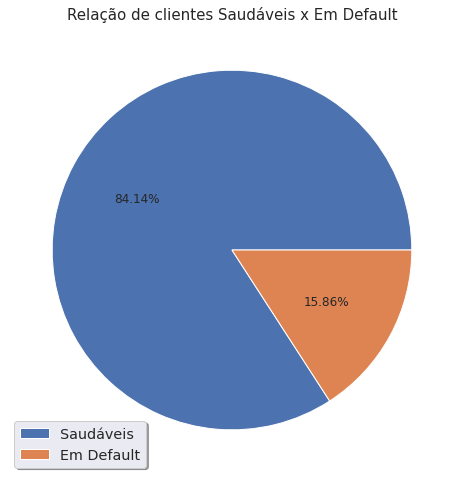

In [6]:
# Note que o número de registros está menor que o apresentado acima
# isso ocorre pois no agrupamento das informações para geração do
# gráfico, são excluídos os registros nulos
plot_clients_situation(df)

Como esperado, a maior parte da nossa base de dados é formada por clientes saudáveis. Podemos observar desde agora que o nosso conjunto de dados está desbalanceado.

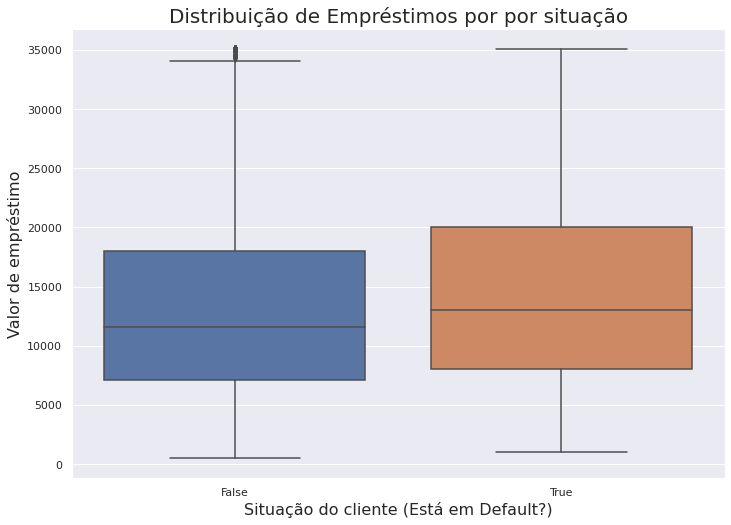

In [7]:
ax = sns.boxplot(x="default", y="amount_borrowed", data=df)
_ = ax.set_title("Distribuição de Empréstimos por por situação", fontsize=20)
_ = ax.set_xlabel("Situação do cliente (Está em Default?)", fontsize=16)
_ = ax.set_ylabel("Valor de empréstimo", fontsize=16)

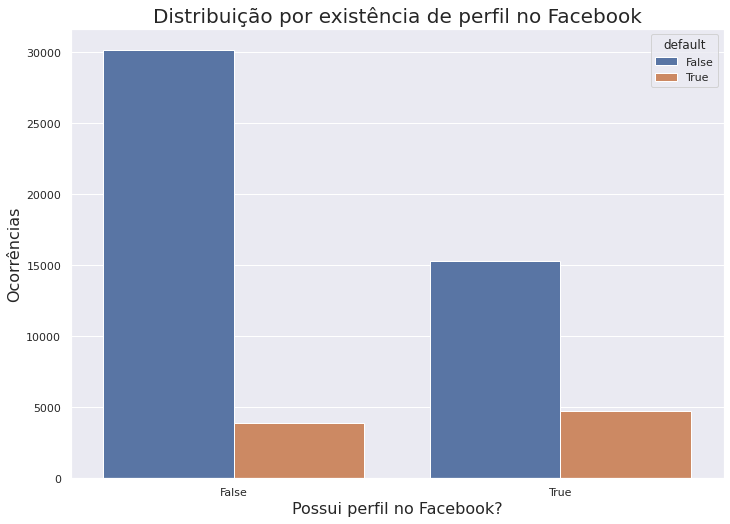

In [8]:
ax = sns.countplot(x="facebook_profile", hue="default", data=df)
_ = ax.set_title("Distribuição por existência de perfil no Facebook", fontsize=20)
_ = ax.set_xlabel("Possui perfil no Facebook?", fontsize=16)
_ = ax.set_ylabel("Ocorrências", fontsize=16)

- Note que a proporção de pessoas em Default no grupo referente de pessoas que possuem perfil no facebook é muito maior que no outro grupo.

**Com perfil no facebook**:

    - Temos cerca de 23.52% de probabilidade de estar em Default

    - Representa cerca de 30.75% de todo o grupo que não está em default
    
**Sem perfil no facebook**:

    - Temos cerca de 11.35% de probabilidade de estar em Default

    - Representa cerca de 12.80% de todo o grupo que não está em default


- **Note que o fato de ter perfil no facebook dobra a chance de termos um cliente em Default**

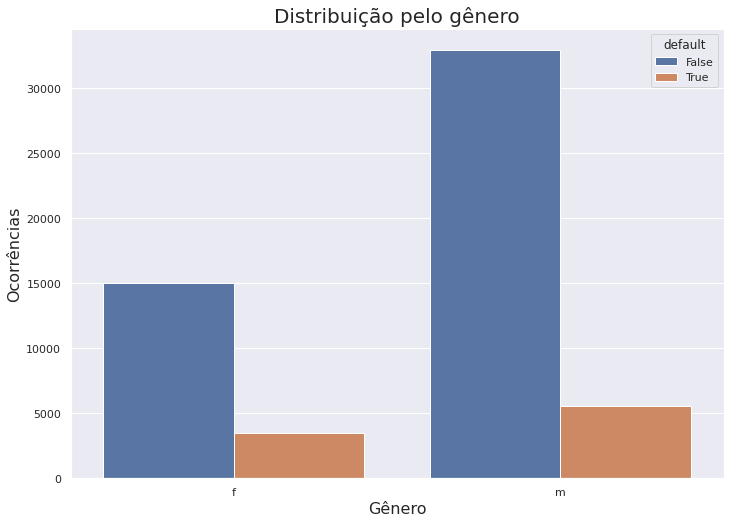

In [9]:
ax = sns.countplot(x="gender", hue="default", data=df)
_ = ax.set_title("Distribuição pelo gênero", fontsize=20)
_ = ax.set_xlabel("Gênero", fontsize=16)
_ = ax.set_ylabel("Ocorrências", fontsize=16)

- Note que a proporção de pessoas em Default no grupo referente de pessoas do genero masculino é muito maior as do genero feminino.

**Masculino**:

    - Temos cerca de 14.45% de probabilidade de estar em Default

    - Representa cerca de 16.89% de todo o grupo que não está em default
    
**Feminino**:

    - Temos cerca de 18.66% de probabilidade de estar em Default

    - Representa cerca de 22.94% de todo o grupo que não está em default


- **Note que clientes do genero feminino são mais provaveis de se estarem em Default**

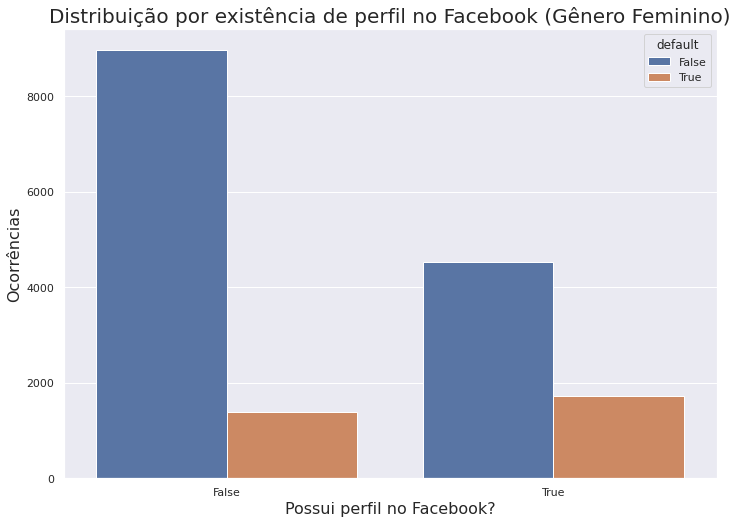

In [10]:
ax = sns.countplot(x="facebook_profile", hue="default", data=df.loc[df["gender"] == "f"])
_ = ax.set_title("Distribuição por existência de perfil no Facebook (Gênero Feminino)", fontsize=20)
_ = ax.set_xlabel("Possui perfil no Facebook?", fontsize=16)
_ = ax.set_ylabel("Ocorrências", fontsize=16)

- Por fim, ao associar estes dois cenários temos a constatação das métricas anteriores

**Clientes com genero feminino que possuem perfil no facebook**
    
    - Temos cerca de 27.52% de probabilidade de estar em Default

    - Representa cerca de 37.96% de todo o grupo que não está em default
    
    
- Aproximadamente 3 a cada 10 mulheres tendem a estar em default


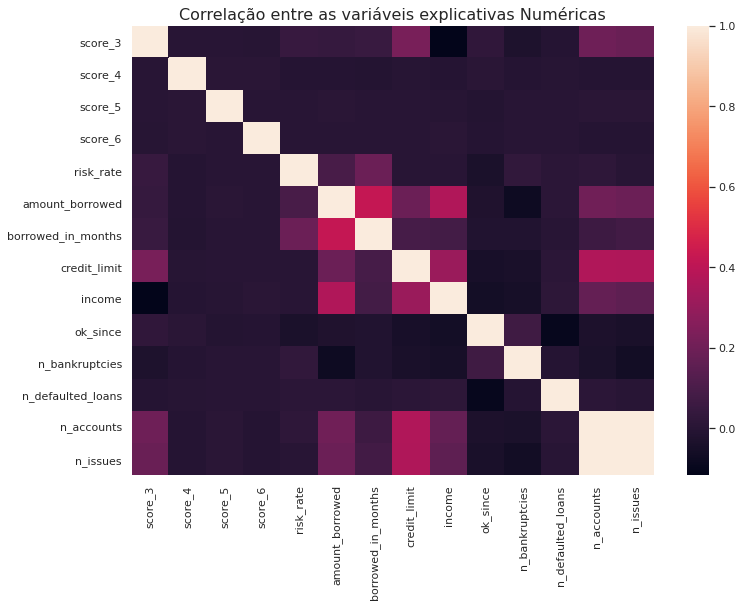

In [11]:
# Analisando a correlação entre as variáveis numéricas do nosso dataset
ax = sns.heatmap(df.corr())
_ = ax.set_title("Correlação entre as variáveis explicativas Numéricas", size=16)

Note que temos uma correlação altíssima entre as variáveis `n_accouts` e `n_issues`. Variáveis explicativas correlatas podem vir a atrapalhar o modelo final, desta forma é indicado que uma destas deve ser retirada do conjunto de dados. A princípio não temos uma escolha definida, após explorar melhor os dados poderemos tomar uma decisão mais assertiva sobre qual destas retirar.

## Pré Processamento

- Nesta seção, vamos identificar as variáveis de interesse para compor o nosso conjunto de dados final de treinamento. Além disso, vamos identificar e tratar anomalias relacionadas aos registros escolhidos.

In [12]:
def get_infos(df_, to_df=True):
    """
        Função auxiliar para capturar e estruturar algumas informações
        referentes a uma estrutura de dados. Para o resultado retornado
        temos a seguinte legenda:
            name - Nome da coluna
            type - Tipo de dados existente na coluna
            total - Número total de registros na coluna
            loss_count - Número de valores nulos na coluna
            loss_rate - Taxa de valores nulos na coluna
            unique_count - Número de valores distintos na coluna
            unique_rate - Taxa de valores distintos na coluna
    """
    response = []
    num_rows = df_.shape[0]
    
    for col in df_:
        null_values = df_.loc[df_[col].isna()].shape[0]
        unique_values = df_[col].unique().shape[0]
        if null_values > 0:
            # Caso existam valores Nulos, descontamos o mesmo
            unique_values = max(unique_values - 1, 0)

        response.append({
            "name": col,
            "type": str(df_[col].dtype),
            "total": num_rows,
            "loss_count": null_values,
            "loss_rate": round(null_values / num_rows, 4),
            "unique_count": unique_values,
            "unique_rate": round(unique_values / num_rows, 4)
        })
    
    if to_df:
        response = pd.DataFrame(response)

    return response

In [13]:
df_exploration = get_infos(df)
df_exploration

,name,type,total,loss_count,loss_rate,unique_count,unique_rate
0,ids,object,64592,0,0.0000,64592,1.0000
1,default,object,64592,4626,0.0716,2,0.0000
2,score_1,object,64592,785,0.0122,7,0.0001
3,score_2,object,64592,785,0.0122,35,0.0005
4,score_3,float64,64592,785,0.0122,88,0.0014
5,score_4,float64,64592,0,0.0000,64592,1.0000
6,score_5,float64,64592,0,0.0000,64592,1.0000
7,score_6,float64,64592,0,0.0000,64592,1.0000
8,risk_rate,float64,64592,785,0.0122,82,0.0013
9,amount_borrowed,float64,64592,785,0.0122,53348,0.8259


Através da estrutura de dados acima, podemos visualizar de forma estruturada algumas informações importantes sobre cada coluna do nosso dataframe

### Identificando valores nulos

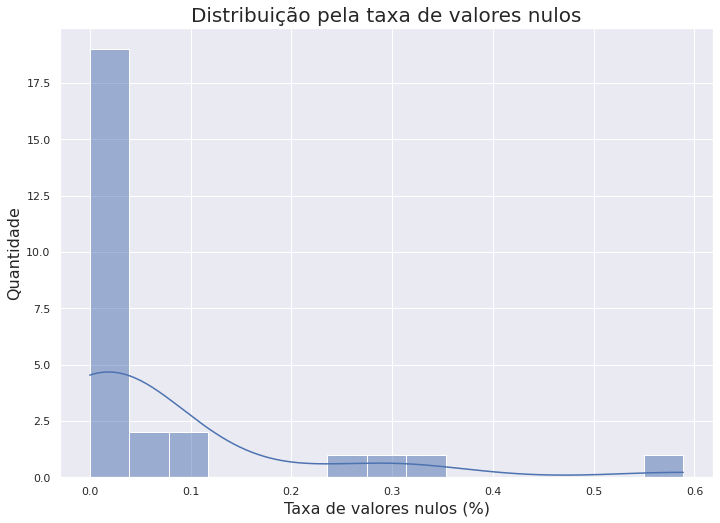

In [14]:
ax = sns.histplot(df_exploration["loss_rate"], kde=True)
_ = ax.set_title("Distribuição pela taxa de valores nulos", fontsize=20)
_ = ax.set_xlabel("Taxa de valores nulos (%)", fontsize=16)
_ = ax.set_ylabel("Quantidade", fontsize=16)

Note que, conseguimos visualizar 2 grupos isolados:

- Grupo cuja taxa de valores nulos está entre cerca de 25% e 35%
- Grupo cuja taxa de valores nulos está em cerca de 60%

Neste caso, vamos visualizar todas as colunas que possuem uma taxa de valores nulos acima de 20%

In [15]:
df_exploration.loc[df_exploration["loss_rate"] > 0.2]

,name,type,total,loss_count,loss_rate,unique_count,unique_rate
11,credit_limit,float64,64592,19753,0.3058,28259,0.4375
14,sign,object,64592,20767,0.3215,12,0.0002
22,ok_since,float64,64592,38038,0.5889,104,0.0016
26,n_issues,float64,64592,16451,0.2547,45,0.0007


Através destas duas análises, podemos tirar algumas conclusões:

- A coluna `ok_since` possui cerca de 60% de valores faltantes. Essa quantidade é muito expressiva para ser inserida de forma artificial, o que poderia influenciar negativamente o modelo inclusive. Esta coluna deve ser retirada do nosso conjunto de dados.

- A coluna `n_issues` possui cerca de 25% de valores faltantes. Este valor também é expressivo e além disso, como vimos acima, esta coluna possui uma correlação alta com `n_accounts`. Em posse desta informação podemos tomar a decisão de retirar esta coluna, o que resolve dois dos nossos problemas. Esta coluna deve ser retirada do nosso conjunto de dados.

- A coluna `sign` possui creca de 32% de valores faltantes. Essa quantidade é muito expressiva para ser inserida de forma artificial, o que poderia influenciar negativamente o modelo inclusive. Esta coluna deve ser retirada do nosso conjunto de dados.

- A coluna `credit_limit` possui creca de 30% de valores faltantes. Essa quantidade é muito expressiva para ser inserida de forma artificial, o que poderia influenciar negativamente o modelo inclusive. Analisando nosso dicionário de dados, tive a impressão de que esta coluna poderia ter uma relação forte com a explicação da nossa variável `Default`, afinal se trata do limite de crédito do cliente. Vamos adotar o seguinte raciociocínio **Excluir todos os registros nulos de `credit_limit` em que o valor de `default` também é nulo**, abaixo vamos ver com mais detalhes a execução desta estratégia. 


Número total de registros na base de dados: 44073
Número de clientes que não estão em Default: 34563
Número de clientes que em Default: 9510




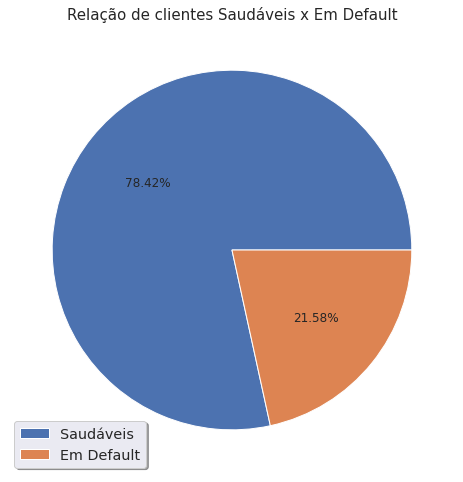

In [16]:
# Neste ponto estamos excluindo apenas os registros que possuem a coluna credit_limit nula
# e que não tenham rótulo de default True. Deste modo, além de ajudar a balancear o nosso
# banco de dados, podemos validar a utilização do limite de crédito.

df_credit_not_null = df.loc[(~df["credit_limit"].isna()) | (df["default"] == True)]
plot_clients_situation(df_credit_not_null)

**Note que, após adotar a estratégia acima, conseguimos melhorar um pouco o balanceamento do dataset. Precisamos verificar se a taxa de valores nulos ainda é muito alta para o campo `credit_limit`, para isso vamos utilizar a mesma visualização feita acima da estrutura de dados gerada.**

In [17]:
df_exploration_not_null = get_infos(df_credit_not_null)
df_exploration_not_null.loc[df_exploration_not_null["name"] == "credit_limit"]

,name,type,total,loss_count,loss_rate,unique_count,unique_rate
11,credit_limit,float64,47725,2886,0.0605,28259,0.5921


**Maravilha!** Note que após retirarmos os registros conforme indicado acima a taxa de valores nulos da coluna `credit_limit` caiu para cerca de 6%, este valor é suficiente para podermos considerar esta coluna! E ainda conseguimos equilibrar um pouco mais o dataset!

### Identificando IDs e conjuntos de rótulos muito distintos

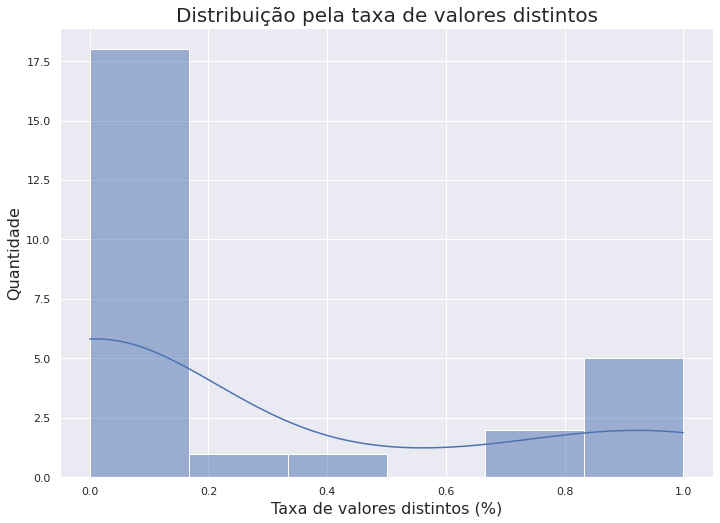

In [18]:
ax = sns.histplot(df_exploration["unique_rate"], kde=True)
_ = ax.set_title("Distribuição pela taxa de valores distintos", fontsize=20)
_ = ax.set_xlabel("Taxa de valores distintos (%)", fontsize=16)
_ = ax.set_ylabel("Quantidade", fontsize=16)

In [19]:
# Verificando se temos colunas que representam "IDs de bancos de dados" ou que não tem representação alguma

# Regras:
# Esta regra indica se existe apenas um único valor distinto para toda a coluna
rule_id = df_exploration["unique_count"] == 1
# Esta regra indica que estamos analisando apenas colunas que possuem rótulos
rule_label = df_exploration["type"] == "object"
# Esta regra indica qual a taxa de valores distintos que queremos analisar (Testei alguns valores e cheguei em 0.01 como limite)
rule_rate = df_exploration["unique_rate"] > 0.01

df_exploration.loc[
    (rule_id) | ((rule_label) & (rule_rate))
]

,name,type,total,loss_count,loss_rate,unique_count,unique_rate
0,ids,object,64592,0,0.0000,64592,1.0000
12,reason,object,64592,791,0.0122,20345,0.3150
18,zip,object,64592,785,0.0122,830,0.0128
19,channel,object,64592,785,0.0122,1,0.0000
20,job_name,object,64592,4795,0.0742,44604,0.6905


Através desta análise e observando o tipo dos dados, podemos tirar algumas conclusões:

- A coluna `ids` (Cujo tipo é não numérico) possuir todos os seus valores distintos, indicando ser apenas um índice. Desta forma, podemos excluir essa coluna das nossas análises futuras.

- A coluna `reason` possui uma taxa de valores únicos de cerca de 31%, se tratando de um conjunto de dados não numéricos isso poderia explodir a cardinalidade ao realizar o encode. Desta forma, podemos excluir esta coluna das nossas análises futuras.

- A coluna `zip`

- A coluna `channel` possui apenas um único valor distinto, note que esta coluna não influencia em nada, pois só possui um valor para todos. Desta forma, podemos excluir esta coluna das nossas análises futuras.

- A coluna `job_name` possui uma taxa de valores únicos de cerca de 70%, se tratando de um conjunto de dados não numéricos isso poderia explodir a cardinalidade ao realizar o encode. Desta forma, podemos excluir esta coluna das nossas análises futuras.


#### O valor 0.01 foi obtido através de uma série de visualizações nos dados, buscando reduzir ao máximo a dimensionalidade final

### Colunas excluídas

In [20]:
# Aplicando a estratégia de exclusão dos registros com base no credit_limit
df = df.loc[(~df["credit_limit"].isna()) | (df["default"] == True)]

# Excluindo linhas nulas da variável que queremos prever
df = df.dropna(subset=["default"])

# Excluindo todas as colunas desnecessárias para o nosso modelo
drop_columns = ["ok_since", "n_issues", "sign", "ids", "reason", "zip", "channel", "job_name"]
df = df.drop(drop_columns, axis=1)

# refazendo a nossa estrutura de dados de exploração
df_exploration = get_infos(df)
df_exploration

,name,type,total,loss_count,loss_rate,unique_count,unique_rate
0,default,object,44073,0,0.0000,2,0.0000
1,score_1,object,44073,0,0.0000,7,0.0002
2,score_2,object,44073,0,0.0000,35,0.0008
3,score_3,float64,44073,0,0.0000,87,0.0020
4,score_4,float64,44073,0,0.0000,44073,1.0000
5,score_5,float64,44073,0,0.0000,44073,1.0000
6,score_6,float64,44073,0,0.0000,44073,1.0000
7,risk_rate,float64,44073,0,0.0000,80,0.0018
8,amount_borrowed,float64,44073,0,0.0000,38741,0.8790
9,borrowed_in_months,float64,44073,0,0.0000,2,0.0000


## Pré Processamento

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split


def get_pipeline_model(model_, columns, model_name="model"):
    """
        Função auxiliar para construir o pipeline de execução do modelo
        incluindo os passos de pré processamento para cada tipo de
        dado, seja ele numérico ou categórico e finaliza com o modelo
        escolhido.
    """
    # Transformações numéricas
    numeric_transformer = Pipeline(
        steps=[
            ("imputer", SimpleImputer(strategy="median")),
            ("normalize", MinMaxScaler())
        ]
    )

    # Transformações categóricas
    categorical_transformer = Pipeline(
        steps=[
            ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
            ("onehot-encoder", OneHotEncoder(handle_unknown="ignore"))
        ]
    )

    # Construindo o pipe completo de pre processamento
    preprocessor = ColumnTransformer(
        transformers=[
            ("numeric", numeric_transformer, columns["numeric"]),
            ("categorical", categorical_transformer, columns["categorical"])
        ]
    )

    # Finalizando o pipelina, indicando o modelo de classificação
    pipeline_model = Pipeline(
        steps=[
            ("preprocessor", preprocessor),
            (model_name, model_)
        ]
    )
    
    return pipeline_model

def prepare_dataset(df_, y_column, test_size=0.3, random_state=42):
    """
        Função auxiliar para preparar os datasets de treino e teste
        e separar as coulunas categóricas e numéricas do dataset
    """
    y = df_[y_column]
    X = df_.drop(y_column, axis=1)
    
    # Como o y só é necessário na fase de treinamento, podemos deixar o encoder
    # aqui dentro mesmo. No caso de modelos que serão realimentados, devemos
    # salvar este encoder para conseguir transformar os novos dados
    le = LabelEncoder()
    le.fit(y)
    y = le.transform(y)
    
    columns = {
        "numeric": X.select_dtypes(include=["int64", "float64"]).columns,
        "categorical": X.select_dtypes(include=["object"]).columns 
    }

    for cat_col in columns["categorical"]:
        # garante que as colunas categoricas estejam com o tipo str
        # evitando problemas com o pipeline
        X[cat_col] = X[cat_col].astype(str)
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=test_size,
        random_state=random_state
    )

    return (X_train, X_test, y_train, y_test), columns

### Conjuntos de Treino x Teste

In [22]:
# Separando nossos conjuntos de treino e teste
splited_dataset, columns = prepare_dataset(df, "default")

### Treinamento dos Modelos

#### Métricas

![title](img/metrics.png)

Vamos analisar os seguintes cenários:

1 -  O nosso modelo prevê que o cliente entrará em default, mas ele erra e o cliente não entra em default

2 -  O nosso modelo prevê que o cliente não entrará em default, mas ele erra e o cliente entra em default


- Ambos os casos são prejudiciais, contudo se analisarmos o caso 2 com mais cautela podemos imaginar que este cenário pode ser mais prejudicial. Note que o caso 2 indica que erramos ao prever uma fraude, portanto isso implica em prejuízo direto.


Sabendo disso, vamos propor métricas que sejam ajustadas para ambos os cenários, mas vamos também analisar métricas mais rigorosas para este cenário 2.

- Precision: Leva em consideração justamente os termos que precisamos para sermos rigorosos com a análise similares ao caso 1.

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate_model(model, x, y, model_name):
    responses = model.predict(x)
    tn, fp, fn, tp = confusion_matrix(y, responses).ravel()
    
    metrics = {
        "model": model_name,
        "accuracy": accuracy_score(y, responses),
        "precision": precision_score(y, responses),
        "precision_micro": precision_score(y, responses, average="micro"),
        "recall": recall_score(y, responses),
        "f1": f1_score(y, responses),
        "f1_micro": f1_score(y, responses, average="micro"),
        "f1_macro": f1_score(y, responses, average="macro"),
        "TN": tn,
        "FP": fp,
        "FN": fn,
        "TP": tp
    }
    
    return metrics

#### Modelos

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

In [25]:
classifiers = {
    "LogisticRegression": LogisticRegression(),
    "KNeighborsClassifier": KNeighborsClassifier(2),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
}

In [26]:
def run_tests(classifiers, columns, splited_dataset):
    X_train, X_test, y_train, y_test = splited_dataset
    responses = []
    models = {}
    for c in classifiers:
        print(f"Run Test in Classifier: {c}")
        print("\tGet pipeline")
        model = get_pipeline_model(classifiers[c], columns)
        print("\tTrain model")
        model.fit(X_train, y_train)
        print("\tEvaluate model")
        metrics = evaluate_model(model, X_test, y_test, c)
        print("\tSave responses")
        responses.append(metrics)
        models[c] = model

    return (pd.DataFrame(responses), models)

In [27]:
metrics, models = run_tests(classifiers, columns, splited_dataset)
metrics

Run Test in Classifier: LogisticRegression
	Get pipeline
	Train model


/home/davidm/miniconda3/envs/data/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


	Evaluate model
	Save responses
Run Test in Classifier: KNeighborsClassifier
	Get pipeline
	Train model
	Evaluate model
	Save responses
Run Test in Classifier: DecisionTreeClassifier
	Get pipeline
	Train model
	Evaluate model
	Save responses
Run Test in Classifier: RandomForestClassifier
	Get pipeline
	Train model
	Evaluate model
	Save responses
Run Test in Classifier: AdaBoostClassifier
	Get pipeline
	Train model
	Evaluate model
	Save responses
Run Test in Classifier: GradientBoostingClassifier
	Get pipeline
	Train model
	Evaluate model
	Save responses


,model,accuracy,precision,precision_micro,recall,f1,f1_micro,f1_macro,TN,FP,FN,TP
0,LogisticRegression,0.793753,0.593220,0.793753,0.158537,0.250206,0.793753,0.565319,10040,312,2415,455
1,KNeighborsClassifier,0.769626,0.392421,0.769626,0.111847,0.174078,0.769626,0.520112,9855,497,2549,321
2,DecisionTreeClassifier,0.765013,0.460749,0.765013,0.484669,0.472406,0.765013,0.660625,8724,1628,1479,1391
3,RandomForestClassifier,0.839964,0.846507,0.839964,0.320906,0.465387,0.839964,0.685642,10185,167,1949,921
4,AdaBoostClassifier,0.853199,0.907814,0.853199,0.360279,0.515839,0.853199,0.714661,10247,105,1836,1034
5,GradientBoostingClassifier,0.851233,0.907124,0.851233,0.350523,0.505655,0.851233,0.709048,10249,103,1864,1006


/home/davidm/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  


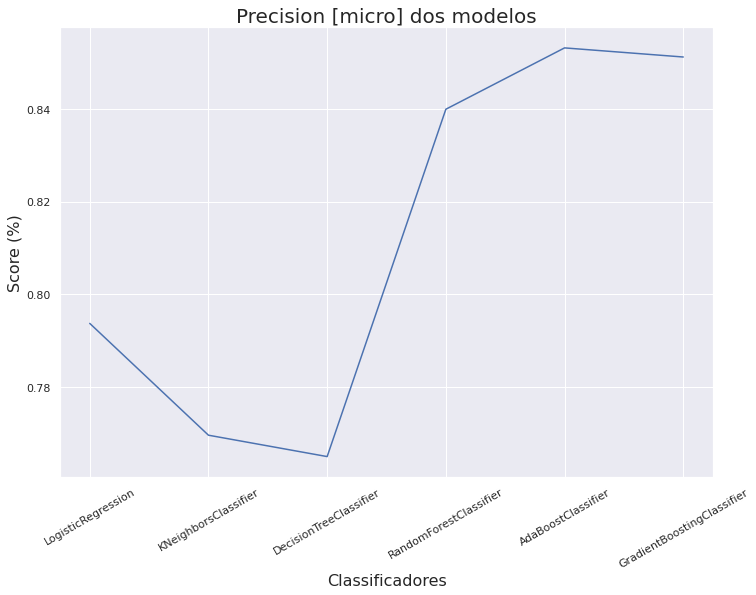

In [28]:
ax = sns.lineplot(x="model", y="precision_micro", data=metrics)
_ = ax.set_xticklabels(metrics["model"].tolist(), rotation=30)
_ = ax.set_title("Precision [micro] dos modelos", fontsize=20)
_ = ax.set_xlabel("Classificadores", fontsize=16)
_ = ax.set_ylabel("Score (%)", fontsize=16)

- Note que o modelo com melhor desempenho de Precision [Micro] é o `AdaBoostClassifier` com `85.32%`

#### Testando o AutoKeras

In [29]:
import autokeras as ak

ak_model = ak.StructuredDataClassifier(max_trials=2, overwrite=True)

In [30]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder

# Preparando os dados para o AutoKeras

# Tratando colunas categóricas
categorical_columns = df[columns["categorical"]].fillna(method="ffill").astype(str)

encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    le.fit(categorical_columns[col])
    encoders[col] = le
    categorical_columns[col] = le.transform(categorical_columns[col])

hot_encoder = OneHotEncoder()
hot_encoder.fit(categorical_columns)
sparse_categorical = hot_encoder.transform(categorical_columns)

# Tratando colunas numéricas
numeric_columns = df[columns["numeric"]]

si = SimpleImputer(missing_values=np.nan, strategy="median")
si.fit(numeric_columns)
numeric_columns = si.transform(numeric_columns)

scaler = MinMaxScaler()
scaler.fit(numeric_columns)
numeric_columns = scaler.transform(numeric_columns)

X = np.concatenate([numeric_columns, sparse_categorical.A], axis=1)

# Transformando o rótulo Default
y = df[["default"]].values.ravel()
le = LabelEncoder()
le.fit(y)
y = le.transform(y)



In [31]:
X_train_ak, X_test_ak, y_train_ak, y_test_ak = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42
)

X_train_ak.shape

(30851, 111)

In [32]:
ak_model.fit(X_train_ak, y_train_ak, epochs=10)

Trial 2 Complete [00h 01m 03s]
val_accuracy: 0.7909549474716187

Best val_accuracy So Far: 0.7909549474716187
Total elapsed time: 00h 02m 05s
INFO:tensorflow:Oracle triggered exit
Epoch 1/10
965/965 [==============================] - 6s 4ms/step - loss: 0.6570 - accuracy: 0.6926
Epoch 2/10
965/965 [==============================] - 3s 3ms/step - loss: 0.4887 - accuracy: 0.7889
Epoch 3/10
965/965 [==============================] - 3s 3ms/step - loss: 0.4768 - accuracy: 0.7922
Epoch 4/10
965/965 [==============================] - 3s 3ms/step - loss: 0.4721 - accuracy: 0.7940
Epoch 5/10
965/965 [==============================] - 3s 3ms/step - loss: 0.4685 - accuracy: 0.7931
Epoch 6/10
965/965 [==============================] - 3s 3ms/step - loss: 0.4640 - accuracy: 0.7953
Epoch 7/10
965/965 [==============================] - 3s 3ms/step - loss: 0.4611 - accuracy: 0.7973
Epoch 8/10
965/965 [==============================] - 3s 3ms/step - loss: 0.4595 - accuracy: 0.8003
Epoch 9/10
965/965 [

In [ ]:
df_metrics = evaluate_model(ak_model, X_test_ak, y_test_ak, "ak_neural_network")
# Esse model do autokeras gera vários warnings, apenas ocultei o output aqui

In [34]:
pd.DataFrame([df_metrics])

,model,accuracy,precision,precision_micro,recall,f1,f1_micro,f1_macro,TN,FP,FN,TP
0,ak_neural_network,0.789139,0.577947,0.789139,0.105923,0.179034,0.789139,0.529035,10130,222,2566,304


## Resultados e Discussões

Ao compararmos o resultado entre os modelos testados acima e o modelo gerado pelo autokeras, podemos concluir que o melhor model continua sendo o `AdaBoostClassifier` com `85.32%` de `Precision [micro]`

In [35]:
class PredictDefault:
    def __init__(self, model):
        self.model = model
    
    def predict(self, data):
        prob = self.model.predict_proba(data)
        return prob[0][1]  

In [36]:
p = PredictDefault(models["AdaBoostClassifier"])

_, X_test, _, _ = splited_dataset
response = p.predict(X_test.head(1))

print(f"A probabilidade deste cliente estar em default é de {round(response * 100, 2)}%")

A probabilidade deste cliente estar em default é de 49.27%


### Considerações

- Será que conseguimos segmentar esses registros e obter previsões melhores com os dados segmentados?
- Como o augmentation poderia melhorar?

